In [2]:
import pandas as pd
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)

dataset = dataset.dropna()
dataset

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx
0,45.0,137.0,12.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
1,45.1,148.0,17.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
2,45.2,154.0,23.0,19.0,37.0,13.0,21.0,45.0,23.0,-12.0
3,45.3,169.0,24.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
4,45.4,183.0,16.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
...,...,...,...,...,...,...,...,...,...,...
9004,144.6,50.0,18.0,18.0,37.0,13.0,21.0,46.0,7484.0,12.0
9005,144.7,50.0,26.0,18.0,37.0,13.0,21.0,46.0,7367.0,12.0
9006,144.8,50.0,20.0,18.0,37.0,13.0,21.0,46.0,7327.0,12.0
9007,144.9,50.0,13.0,18.0,37.0,12.0,21.0,46.0,7218.0,12.0


In [10]:
dataset.quantile(q=[0, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx
0.000,45.0,48.0,9.0,11.0,37.0,12.0,20.0,44.0,20.0,-12.0
0.001,45.1,49.0,10.0,13.0,37.0,12.0,20.0,45.0,21.0,-12.0
0.010,46.0,49.0,11.0,16.0,37.0,12.0,20.0,45.0,22.0,-12.0
0.100,55.0,50.0,13.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
0.200,65.0,50.0,15.0,18.0,37.0,13.0,21.0,45.0,23.0,-9.0
0.500,95.0,51.0,26.0,22.0,41.0,16.0,23.0,47.0,24.0,0.0
0.600,105.0,53.0,31.0,39.0,63.0,36.0,44.8,57.0,24.0,3.0
0.700,115.0,267.8,584.0,795.6,661.4,598.8,596.2,705.0,25.0,6.0
0.800,125.0,9118.8,7011.0,8987.0,7053.4,6809.8,6730.4,7774.2,2335.8,9.0
0.900,135.0,18894.0,14545.6,18654.2,14464.8,14544.2,14220.4,16154.8,15458.4,12.0


In [15]:
dataset = dataset[dataset.offsetx==0]
dataset.quantile(q=[0, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx
0.000,45.0,49.0,11.0,11.0,37.0,12.0,21.0,44.0,21.0,0.0
0.001,45.1,50.0,11.0,13.0,37.0,12.0,21.0,45.0,22.0,0.0
0.010,46.0,50.0,12.0,15.0,37.0,13.0,21.0,45.0,23.0,0.0
0.100,55.0,50.0,14.0,18.0,37.0,13.0,21.0,45.0,23.0,0.0
0.200,65.0,51.0,17.0,19.0,38.0,13.0,21.0,45.0,24.0,0.0
0.500,95.0,53.0,28.0,29.0,51.0,24.0,33.0,52.0,24.0,0.0
0.600,105.0,55.0,47.0,97.0,99.0,66.0,77.0,94.0,25.0,0.0
0.700,115.0,1934.0,2741.0,3621.0,3040.0,2723.0,2792.0,3094.0,28.0,0.0
0.800,125.0,16871.0,13023.0,16756.0,13076.0,12931.0,12763.0,14438.0,7259.0,0.0
0.900,135.0,26674.0,20578.0,26322.0,20452.0,20882.0,20247.0,22942.0,23154.0,0.0


In [17]:
# substract min value
dataset = dataset - dataset.min()
dataset

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx
4004,0.0,5519.0,18.0,7.0,1.0,1.0,0.0,1.0,2.0,0.0
4005,0.1,5766.0,20.0,5.0,1.0,1.0,0.0,1.0,2.0,0.0
4006,0.2,5885.0,9.0,5.0,0.0,1.0,0.0,1.0,2.0,0.0
4007,0.3,6121.0,8.0,7.0,1.0,1.0,0.0,1.0,2.0,0.0
4008,0.4,6404.0,17.0,6.0,1.0,1.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5000,99.6,1.0,12.0,7.0,0.0,1.0,1.0,6.0,21451.0,0.0
5001,99.7,1.0,16.0,7.0,1.0,1.0,0.0,5.0,21376.0,0.0
5002,99.8,1.0,5.0,7.0,0.0,1.0,0.0,5.0,21236.0,0.0
5003,99.9,1.0,1.0,7.0,1.0,1.0,1.0,5.0,21060.0,0.0


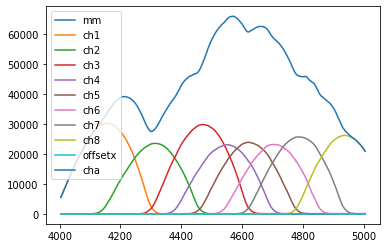

In [21]:
dataset['cha'] = dataset.ch1 + dataset.ch2 + dataset.ch3 + dataset.ch4 + dataset.ch5 + dataset.ch6 + dataset.ch7 + dataset.ch8
dataset
dataset.plot()

In [334]:
# drop too low levels
lowlevel = 8
for i in range(1,9):
    dataset.iloc[:,i] = [0 if j < lowlevel else j for j in dataset.iloc[:,i]]
dataset

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx
0,45.0,137.0,12.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
1,45.1,148.0,17.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
2,45.2,154.0,23.0,19.0,37.0,13.0,21.0,45.0,23.0,-12.0
3,45.3,169.0,24.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
4,45.4,183.0,16.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
...,...,...,...,...,...,...,...,...,...,...
9004,144.6,50.0,18.0,18.0,37.0,13.0,21.0,46.0,7484.0,12.0
9005,144.7,50.0,26.0,18.0,37.0,13.0,21.0,46.0,7367.0,12.0
9006,144.8,50.0,20.0,18.0,37.0,13.0,21.0,46.0,7327.0,12.0
9007,144.9,50.0,13.0,18.0,37.0,12.0,21.0,46.0,7218.0,12.0


In [335]:
# generate standardized
#origcols = []
#for i in range(1,9):
#    origcols.append(f'ch{i}')
#    #dataset[f'ch_norm_{i}'] = (dataset[f'ch{i}'] - dataset[f'ch{i}'].mean()) / dataset[f'ch{i}'].std()
#    dataset[f'ch_norm_{i}'] = dataset[f'ch{i}'] / dataset[f'ch{i}'].max()
#
#dataset.drop(origcols, axis=1, inplace=True)
#    
#print(dataset)


In [336]:
dataset.shape

(9009, 10)

In [337]:
data = dataset.sample(frac=0.5, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

data['offsetx_abs'] = data.offsetx.abs()


print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4504, 11)
Unseen Data For Predictions: (4505, 10)


In [338]:
from pycaret.regression import *

In [339]:
#? setup

In [340]:
exp_reg101 = setup(data = data, 
                   transformation=False, 
                   target = 'mm', 
                   pca = False,
                   polynomial_features=False,
                   polynomial_degree=3,
                   remove_outliers=False,
                   outliers_threshold=0.05,
                   trigonometry_features=False,
                   session_id=123, 
                   feature_selection=False,
                   feature_interaction=False,
                   feature_ratio=False,
                   ignore_features=['offsetx', 'offsetx_abs']
                  )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4504, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [341]:
#exp_reg101

In [342]:
# compare_models()


In [343]:
#create_model.__doc__
#help(tune_model)
# et=tune_model('et', n_iter=100)
et=create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2887,0.4562,0.6754,0.9994,0.0122,0.0043
1,0.4745,1.7458,1.3213,0.9982,0.0251,0.0083
2,0.2979,0.6243,0.7902,0.9992,0.0151,0.0048
3,0.4195,0.9134,0.9557,0.9990,0.0182,0.0070
4,0.3146,0.7519,0.8671,0.9990,0.0162,0.0050
5,0.3312,0.7059,0.8401,0.9992,0.0154,0.0052
6,0.3070,0.5869,0.7661,0.9993,0.0144,0.0049
7,0.3904,1.0033,1.0017,0.9988,0.0188,0.0065
8,0.3416,0.8333,0.9128,0.9990,0.0172,0.0056
9,0.3442,0.6180,0.7861,0.9992,0.0142,0.0055


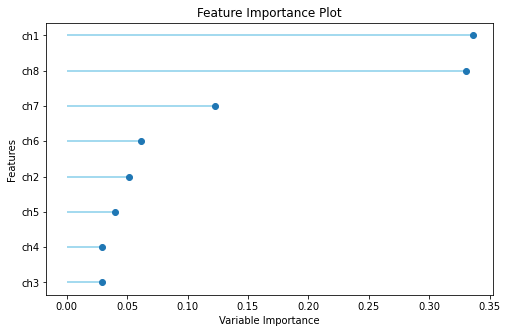

In [344]:
plot_model(et, 'feature')

In [345]:
#interpret_model(et)

In [346]:
#interpret_model(et, plot = 'correlation')

In [347]:
#interpret_model(et, plot = 'reason', observation = 10)

In [348]:
#pred=predict_model(et, data=data_unseen)
#pred

In [349]:
#? predict_model

In [350]:
#save_model(et, 'savedmodelet')
#et_saved = load_model('savedmodelet')

In [351]:
#save_experiment('experiment')

In [352]:
#experiment_loaded = load_experiment('experiment')

In [ ]:
import pandas as pd
import time
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)
dataset = dataset.dropna()

dataset['offsetx_abs'] = dataset.offsetx.abs()

# drop too low levels

from pycaret.regression import *

for lowlevel in range(0, 10000, 100):
    data = dataset.sample(frac=0.5, random_state=786)
    data_unseen = dataset.drop(data.index).reset_index(drop=True)
    data.reset_index(drop=True, inplace=True)

    for i in range(1,9):
            data.iloc[:,i] = [0 if j < lowlevel else j for j in data.iloc[:,i]]

    es = setup(data = data, target = 'mm', ignore_features=['offsetx', 'offsetx_abs'], silent=True)
    print(f'lowlevel: {lowlevel}')
    et = create_model('et')
    time.sleep(10)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7147
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4504, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


lowlevel: 6800


IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:58:36
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 8 of 10
ETC,. . . . . . . . . . . . . . . . . .,1.2 Seconds Remaining


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6924,65.4930,8.0928,0.9198,0.0985,0.0354
1,2.5085,57.1620,7.5606,0.9283,0.0937,0.0327
2,3.5665,97.9818,9.8986,0.8910,0.1294,0.0520
3,2.8325,62.7254,7.9199,0.9272,0.1050,0.0404
4,2.6560,40.5574,6.3685,0.9504,0.0959,0.0428
5,2.9087,63.6721,7.9795,0.9267,0.1046,0.0420
6,2.5532,57.4971,7.5827,0.9282,0.0954,0.0349
